<a href="https://colab.research.google.com/github/sanskriti-iyer/Music-and-Mental-Health/blob/main/Music_and_Mental_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing relevant libraries

In [37]:
!pip install scikit-posthocs

In [38]:
import pandas as pd
import numpy as np
from scipy.stats import normaltest
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.stats import mannwhitneyu, kruskal
import scikit_posthocs as sp

Importing dataset

In [23]:
path = '/content/drive/MyDrive/mxmh_survey_results.csv'
data = pd.read_csv(path)

In [24]:
data.head()

,UniqueID,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,...,Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,1,18.0,Spotify,3.0,1.0,1.0,1.0,Latin,1,1.0,...,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,2,63.0,Pandora,1.5,1.0,0.0,0.0,Rock,1,0.0,...,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,3,18.0,Spotify,4.0,0.0,0.0,0.0,Video game music,0,1.0,...,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,0 effect,I understand.
3,4,61.0,YouTube Music,2.5,1.0,0.0,1.0,Jazz,1,1.0,...,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,5,18.0,Spotify,4.0,1.0,0.0,0.0,R&B,1,0.0,...,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.


# **Correlation Analysis**

D’Agostino and Pearson to check for normality for all four mental disorders

Statistic: 71.21215852821852, p-value: 3.439349049888263e-16
Data not normal


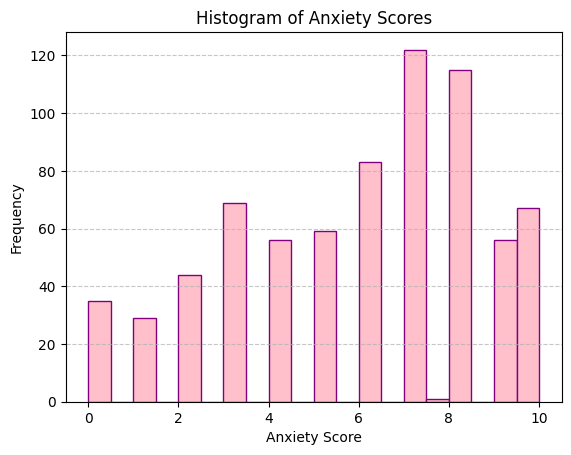

In [25]:
#Anxiety
stat, p = normaltest(data['Anxiety'].dropna())
print(f"Statistic: {stat}, p-value: {p}")
if p > 0.05:
    print("Data likely normal")
else:
    print("Data not normal")

#histogram for anxiety
plt.hist(data['Anxiety'].dropna(), bins=20, edgecolor='purple', color='pink')
plt.title('Histogram of Anxiety Scores')
plt.xlabel('Anxiety Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Statistic: 350.9625595163256, p-value: 6.1581253342883825e-77
Data not normal


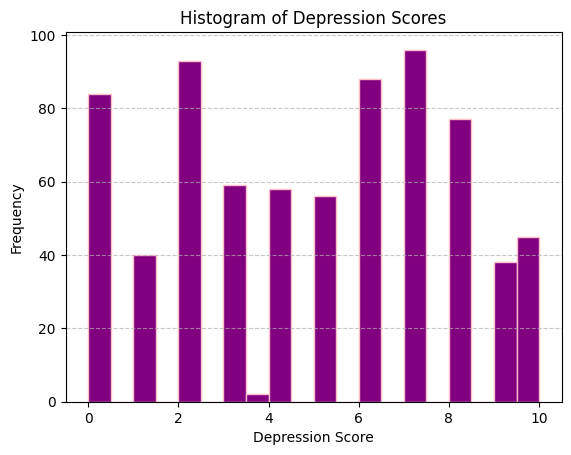

In [26]:
#Depression
stat, p = normaltest(data['Depression'].dropna())
print(f"Statistic: {stat}, p-value: {p}")
if p > 0.05:
    print("Data likely normal")
else:
    print("Data not normal")

#histogram for depression
plt.hist(data['Depression'].dropna(), bins=20, edgecolor='pink', color='purple')
plt.title('Histogram of Depression Scores')
plt.xlabel('Depression Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Statistic: 83.50475013346511, p-value: 7.365019519041391e-19
Data not normal


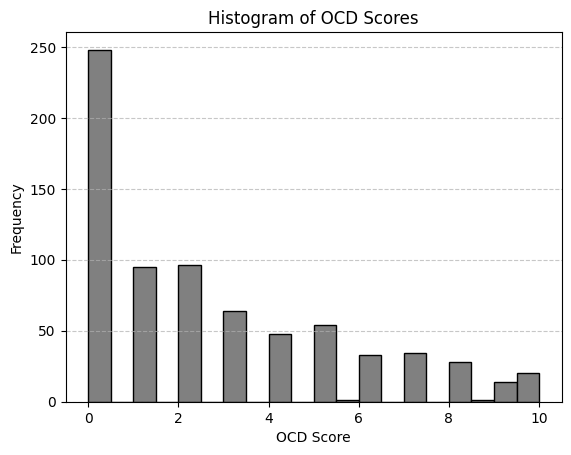

In [27]:
#OCD
stat, p = normaltest(data['OCD'].dropna())
print(f"Statistic: {stat}, p-value: {p}")
if p > 0.05:
    print("Data likely normal")
else:
    print("Data not normal")

#histogram for OCD
plt.hist(data['OCD'].dropna(), bins=20, edgecolor='black', color='gray')
plt.title('Histogram of OCD Scores')
plt.xlabel('OCD Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Statistic: 192.2081464501976, p-value: 1.8303380574709193e-42
Data not normal


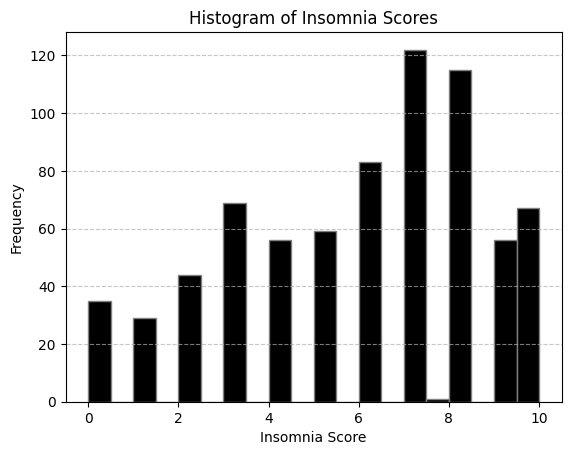

In [28]:
#insomnia
stat, p = normaltest(data['Insomnia'].dropna())
print(f"Statistic: {stat}, p-value: {p}")
if p > 0.05:
    print("Data likely normal")
else:
    print("Data not normal")

#histogram for insomnia
plt.hist(data['Anxiety'].dropna(), bins=20, edgecolor='gray', color='black')
plt.title('Histogram of Insomnia Scores')
plt.xlabel('Insomnia Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Question 1: What is the correlation between the four disorders?

*Note: Using spearman correlation because there is no normality for all four disorders*

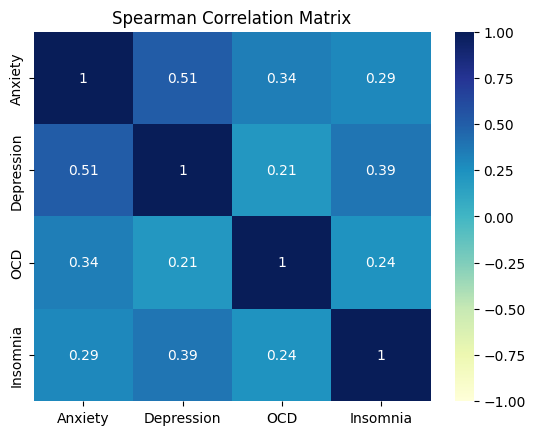

In [29]:
mental_vars = data[['Anxiety', 'Depression', 'OCD', 'Insomnia']]

#spearman correlation
spearman_corr = mental_vars.corr(method='spearman')

#heatmap
sns.heatmap(spearman_corr, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
plt.title('Spearman Correlation Matrix')
plt.show()

# **Statistical Analysis**

Question 2: Is there a significant difference in anxiety levels between people who listen to music while working vs those who don’t?

In [30]:
#people who listen to music while working
group1 = data[data['While working'] == 1]['Anxiety']

#people who don't listen to music while working
group2 = data[data['While working'] == 0]['Anxiety']

stat, p = mannwhitneyu(group1, group2, alternative='two-sided')

print(f"Mann–Whitney U statistic: {stat}")
print(f"P-value: {p}")

if p < 0.05:
    print("Significant difference in anxiety levels between the two groups.")
else:
    print("No significant difference in anxiety levels between the two groups.")

Mann–Whitney U statistic: 46468.0
P-value: 0.4166013942464277
No significant difference in anxiety levels between the two groups.


Question 3.1: Does music help with insomnia or depression?

In [35]:
# Group insomnia scores by Music_effects category
groups_insomnia = [group["Insomnia"].dropna() for name, group in data.groupby("Music effects")]

# Group depression scores by Music_effects category
groups_depression = [group["Depression"].dropna() for name, group in data.groupby("Music effects")]

# Kruskal-Wallis test for Insomnia
stat_insomnia, p_insomnia = kruskal(*groups_insomnia)

# Kruskal-Wallis test for Depression
stat_depression, p_depression = kruskal(*groups_depression)

print(f"Insomnia: H-statistic = {stat_insomnia:.2f}, p-value = {p_insomnia:.4f}")
print(f"Depression: H-statistic = {stat_depression:.2f}, p-value = {p_depression:.4f}")

if p_insomnia < 0.05:
    print("Significant difference in Insomnia scores among different Music effects groups.")
else:
    print("No significant difference in Insomnia scores among Music_effects groups.")

if p_depression < 0.05:
    print("Significant difference in Depression scores among different Music effects groups.")
else:
    print("No significant difference in Depression scores among Music effects groups.")


Insomnia: H-statistic = 1.75, p-value = 0.4174
Depression: H-statistic = 13.40, p-value = 0.0012
No significant difference in Insomnia scores among Music_effects groups.
Significant difference in Depression scores among different Music effects groups.


Question 3.2: Is there a significant difference in depression scores among people who perceive music as having 'no effect', 'improving', or 'worsening' their depression?

In [42]:
# Make sure 'Depression' and 'Music_effects' columns exist and have no missing values for these
data_clean = data[['Depression', 'Music effects']].dropna()

# Kruskal-Wallis test (just to confirm)
groups = [group["Depression"].values for name, group in data_clean.groupby("Music effects")]
stat, p = kruskal(*groups)
print(f"Kruskal-Wallis H-statistic: {stat}, p-value: {p}")

# Dunn's post-hoc test with Bonferroni correction
dunn_results = sp.posthoc_dunn(data_clean, val_col='Depression', group_col='Music effects', p_adjust='bonferroni')

print("\nDunn's post-hoc pairwise comparison p-values:")
print(dunn_results)

# Optional: highlight significant pairs (p < 0.05)
significant_pairs = (dunn_results < 0.05)
print("\nSignificant differences (True means significant):")
print(significant_pairs)


Kruskal-Wallis H-statistic: 13.40445282735882, p-value: 0.0012281744320769956

Dunn's post-hoc pairwise comparison p-values:
          0 effect   Improve    Worsen
0 effect  1.000000  0.190384  0.001228
Improve   0.190384  1.000000  0.008460
Worsen    0.001228  0.008460  1.000000

Significant differences (True means significant):
          0 effect  Improve  Worsen
0 effect     False    False    True
Improve      False    False    True
Worsen        True     True   False


Question 3.3: Which music genres are associated with higher or lower average depression levels among listeners who engage with them?

In [48]:
genres = [
    'Frequency [Classical]', 'Frequency [Country]', 'Frequency [EDM]', 'Frequency [Folk]',
    'Frequency [Gospel]', 'Frequency [Hip hop]', 'Frequency [Jazz]', 'Frequency [K pop]',
    'Frequency [Latin]', 'Frequency [Lofi]', 'Frequency [Metal]', 'Frequency [Pop]',
    'Frequency [R&B]', 'Frequency [Rap]', 'Frequency [Rock]', 'Frequency [Video game music]'
]

genre_depression = []

for genre in genres:
    filtered = data[data[genre] != 'Never']
    avg_dep = filtered['Depression'].mean()
    genre_depression.append((genre, avg_dep))

genre_dep_df = pd.DataFrame(genre_depression, columns=['Genre', 'Avg_Depression'])
genre_dep_df = genre_dep_df.sort_values(by='Avg_Depression', ascending=False)

print(genre_dep_df.head)

<bound method NDFrame.head of                            Genre  Avg_Depression
10             Frequency [Metal]        5.275424
2                Frequency [EDM]        5.145688
13               Frequency [Rap]        5.134328
5            Frequency [Hip hop]        5.068468
3               Frequency [Folk]        5.045045
15  Frequency [Video game music]        4.985000
12               Frequency [R&B]        4.968689
9               Frequency [Lofi]        4.963816
14              Frequency [Rock]        4.951938
8              Frequency [Latin]        4.916382
7              Frequency [K pop]        4.879688
6               Frequency [Jazz]        4.849474
11               Frequency [Pop]        4.847794
4             Frequency [Gospel]        4.808458
0          Frequency [Classical]        4.782187
1            Frequency [Country]        4.756997>


In [49]:
print(genre_dep_df.head(5))

                  Genre  Avg_Depression
10    Frequency [Metal]        5.275424
2       Frequency [EDM]        5.145688
13      Frequency [Rap]        5.134328
5   Frequency [Hip hop]        5.068468
3      Frequency [Folk]        5.045045
